In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

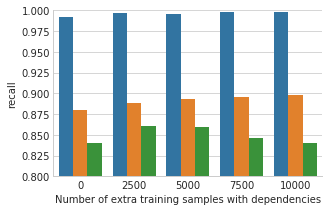

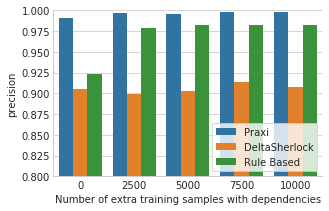

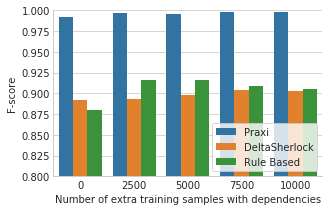

In [10]:
df = pd.read_csv('/home/ates/deltasherlock/experiments/plots/results.csv')

sns.factorplot(data=df, x='dirty_count', hue='method', y='recall', hue_order=['Praxi', 'DeltaSherlock', 'Rule Based'], legend=False, kind='bar', aspect=1.5, size=3)
plt.ylim((0.8, 1))
plt.xlabel('Number of extra training samples with dependencies')
#plt.savefig('/home/ates/prospectus/figures/ds_recall.pdf')

sns.factorplot(data=df, x='dirty_count', hue='method', y='precision', hue_order=['Praxi', 'DeltaSherlock', 'Rule Based'], kind='bar', legend=False, aspect=1.5, size=3)
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of extra training samples with dependencies')
#plt.savefig('/home/ates/prospectus/figures/ds_precision.pdf')

df['F-score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

sns.factorplot(data=df, x='dirty_count', hue='method', y='F-score', hue_order=['Praxi', 'DeltaSherlock', 'Rule Based'], kind='bar', legend=False, aspect=1.5, size=3)
plt.ylim((0.8, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of extra training samples with dependencies')
plt.savefig('/home/ates/deltasherlock/paper/figures/single_label.pdf')

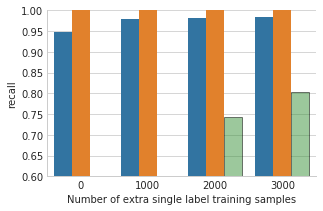

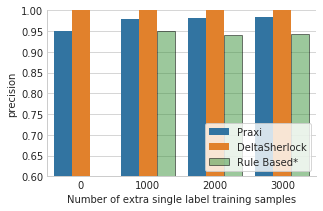

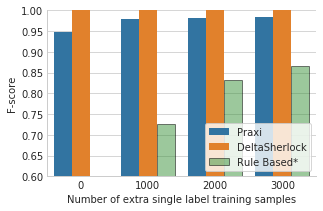

In [2]:
df = pd.read_csv('/home/ates/deltasherlock/experiments/plots/ml_results.csv')

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='recall', 
                   hue_order=['Praxi', 'DeltaSherlock', 'Rule Based*'], 
                   legend=False, kind='bar', aspect=1.5, size=3)
for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.6, 1))
plt.xlabel('Number of extra single label training samples')
#plt.savefig('/home/ates/prospectus/figures/ds_recall.pdf')

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='precision', 
                   hue_order=['Praxi', 'DeltaSherlock', 'Rule Based*'], 
                   kind='bar', legend=False, aspect=1.5, size=3)
for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.6, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of extra single label training samples')
#plt.savefig('/home/ates/prospectus/figures/ds_precision.pdf')

df['F-score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])

g = sns.factorplot(data=df, x='dirty_count', hue='method', y='F-score', 
                   hue_order=['Praxi', 'DeltaSherlock', 'Rule Based*'], 
                   kind='bar', legend=False, aspect=1.5, size=3)

for i, bar in enumerate(g.axes[0][0].patches):
    if i > 7:
        bar.set_alpha(0.5)
        bar.set_edgecolor('black')
plt.ylim((0.6, 1))
plt.legend(loc='lower right', frameon=True)
plt.xlabel('Number of extra single label training samples')
plt.savefig('/home/ates/deltasherlock/paper/figures/multi_label.pdf')